In [ ]:
!unzip free-spoken-digit-dataset.zip

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
from keras.engine import Model
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

ModuleNotFoundError: ignored

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import librosa.display
import random as rn
from keras.layers import Dense
from keras import Input
from tensorflow import keras
from keras.utils import to_categorical
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, \
    LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D

In [ ]:
DATA_DIR = r'/content/free-spoken-digit-dataset-1.0.10/recordings/'

In [ ]:
random_file = rn.choice(os.listdir(DATA_DIR))

In [ ]:
wav, sr = librosa.load(DATA_DIR + random_file)
print('sr:', sr)
print('wav shape:', wav.shape)
print('length:', wav.shape[0]/float(sr), 'secs')

sr: 22050
wav shape: (16422,)
length: 0.7447619047619047 secs


In [ ]:
wav, sr = librosa.load(DATA_DIR + random_file, sr=None)
print('sr:', sr)
print('wav shape:', wav.shape)
print('length:', wav.shape[0]/float(sr), 'secs')

sr: 8000
wav shape: (5958,)
length: 0.74475 secs


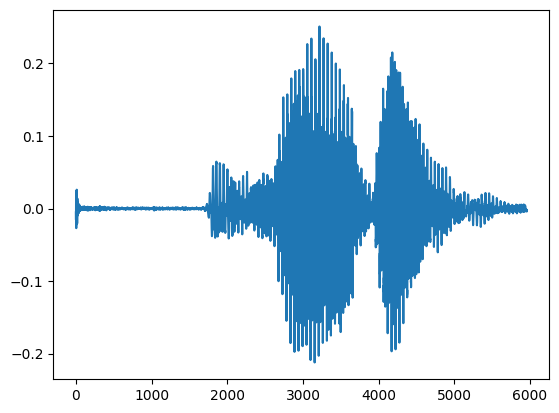

In [ ]:
plt.plot(wav)

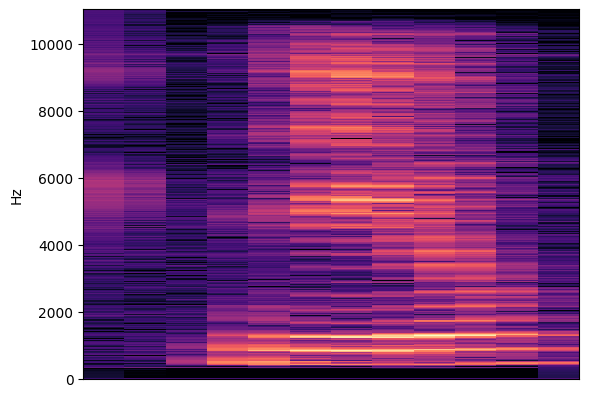

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')

In [ ]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))

for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram,40)

        mel_spectrogram = librosa.feature.melspectrogram(wav)
        padded_mel_spectrogram = pad2d(mel_spectrogram,40)

        mfcc = librosa.feature.mfcc(wav)
        padded_mfcc = pad2d(mfcc,40)

        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise

train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))



print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_mel_spectrograms:', train_mel_spectrograms.shape)
print('train_mfccs:', train_mfccs.shape)
print('train_y:', train_y.shape)
print()
print('test_X:', test_X.shape)
print('test_spectrograms:', test_spectrograms.shape)
print('test_mel_spectrograms:', test_mel_spectrograms.shape)
print('test_mfccs:', test_mfccs.shape)
print('test_y:', test_y.shape)

0_george_29.wav melspectrogram() takes 0 positional arguments but 1 was given


TypeError: ignored

In [ ]:
test_speaker = 'theo'
train_X = []
train_spectrograms = []
train_mel_spectrograms = []
train_mfccs = []
train_y = []

test_X = []
test_spectrograms = []
test_mel_spectrograms = []
test_mfccs = []
test_y = []

pad1d = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0],i - a.shape[1]))))


for fname in os.listdir(DATA_DIR):
    try:
        if '.wav' not in fname or 'dima' in fname:
            continue
        struct = fname.split('_')
        digit = struct[0]
        speaker = struct[1]
        wav, sr = librosa.load(DATA_DIR + fname)
        padded_x = pad1d(wav, 30000)
        spectrogram = np.abs(librosa.stft(wav))
        padded_spectogram = pad2d(spectrogram,40)

        mel_spectrogram = librosa.feature.melspectrogram(y=wav, sr=sr)

        padded_mel_spectrogram = pad2d(mel_spectrogram,40)

        mfcc = librosa.feature.mfcc(y=wav, sr=sr)

        padded_mfcc = pad2d(mfcc,40)

        if speaker == test_speaker:
            test_X.append(padded_x)
            test_spectrograms.append(padded_spectogram)
            test_mel_spectrograms.append(padded_mel_spectrogram)
            test_mfccs.append(padded_mfcc)
            test_y.append(digit)
        else:
            train_X.append(padded_x)
            train_spectrograms.append(padded_spectogram)
            train_mel_spectrograms.append(padded_mel_spectrogram)
            train_mfccs.append(padded_mfcc)
            train_y.append(digit)
    except Exception as e:
        print(fname, e)
        raise

train_X = np.vstack(train_X)
train_spectrograms = np.array(train_spectrograms)
train_mel_spectrograms = np.array(train_mel_spectrograms)
train_mfccs = np.array(train_mfccs)
train_y = to_categorical(np.array(train_y))

test_X = np.vstack(test_X)
test_spectrograms = np.array(test_spectrograms)
test_mel_spectrograms = np.array(test_mel_spectrograms)
test_mfccs = np.array(test_mfccs)
test_y = to_categorical(np.array(test_y))


print('train_X:', train_X.shape)
print('train_spectrograms:', train_spectrograms.shape)
print('train_mel_spectrograms:', train_mel_spectrograms.shape)
print('train_mfccs:', train_mfccs.shape)
print('train_y:', train_y.shape)
print()
print('test_X:', test_X.shape)
print('test_spectrograms:', test_spectrograms.shape)
print('test_mel_spectrograms:', test_mel_spectrograms.shape)
print('test_mfccs:', test_mfccs.shape)
print('test_y:', test_y.shape)

train_X: (2500, 30000)
train_spectrograms: (2500, 1025, 40)
train_mel_spectrograms: (2500, 128, 40)
train_mfccs: (2500, 20, 40)
train_y: (2500, 10)

test_X: (500, 30000)
test_spectrograms: (500, 1025, 40)
test_mel_spectrograms: (500, 128, 40)
test_mfccs: (500, 20, 40)
test_y: (500, 10)


In [ ]:
ip = Input(shape=(train_X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(10, activation='softmax')(hidden)
model = Model(input=ip, output=op)

model.summary()

ValueError: ignored

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
ip = Input(shape=(train_X[0].shape))
hidden = Dense(128, activation='relu')(ip)
op = Dense(10, activation='softmax')(hidden)
model = Model(inputs=ip, outputs=op)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)         │ (None, 30000)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 128)                   │   3,840,128 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_5 (Dense)                    │ (None, 10)                    │       1,290 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 3,841,418 (14.65 MB)

 Trainable params: 3,841,418 (14.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X,
          train_y,
          epochs=10,
          batch_size=32,
          validation_data=(test_X, test_y))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.1494 - loss: 2.2985 - val_accuracy: 0.1460 - val_loss: 2.2934
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5637 - loss: 1.6944 - val_accuracy: 0.1360 - val_loss: 2.2973
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6956 - loss: 1.2755 - val_accuracy: 0.1500 - val_loss: 2.3084
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7961 - loss: 0.9413 - val_accuracy: 0.1500 - val_loss: 2.3279
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8314 - loss: 0.7337 - val_accuracy: 0.1520 - val_loss: 2.3348
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8792 - loss: 0.5880 - val_accuracy: 0.1560 - val_loss: 2.3481
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8882 - loss: 0.5168 - val_accuracy: 0.1560 - val_loss: 2.3652
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9038 - loss: 0.4634 - val_accuracy: 0.1460 - val_loss

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

KeyError: ignored

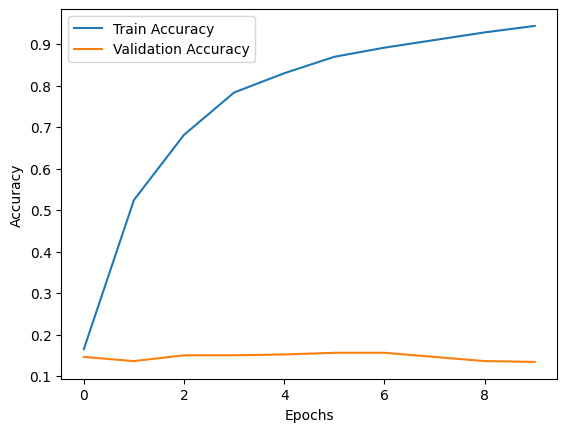

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

SPECTROGRAMS CNN

In [ ]:
train_X_ex = np.expand_dims(train_spectrograms, -1)
test_X_ex = np.expand_dims(test_spectrograms, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2500, 1025, 40, 1)
test X shape: (500, 1025, 40, 1)


In [ ]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(input=ip, output=op)

model.summary()

ValueError: ignored

In [ ]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(inputs=ip, outputs=op)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)         │ (None, 1025, 40, 1)           │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_3 (Conv2D)                  │ (None, 1022, 37, 64)          │       1,088 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 255, 9, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 255, 9, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 146880)                │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_10 (Dense)                   │ (None, 32)                    │   4,700,192 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_11 (Dense)                   │ (None, 10)                    │         330 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 4,701,610 (17.94 MB)

 Trainable params: 4,701,610 (17.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_data=(test_X_ex, test_y))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.2688 - loss: 2.1677 - val_accuracy: 0.2560 - val_loss: 1.9710
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7432 - loss: 0.8190 - val_accuracy: 0.4940 - val_loss: 1.6952
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8540 - loss: 0.4723 - val_accuracy: 0.4820 - val_loss: 1.5465
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9018 - loss: 0.3328 - val_accuracy: 0.5620 - val_loss: 1.4065
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9118 - loss: 0.2743 - val_accuracy: 0.4580 - val_loss: 1.5610
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9356 - loss: 0.2111 - val_accuracy: 0.5180 - val_loss: 1.4734
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9584 - loss: 0.1468 - val_accuracy: 0.5080 - val_loss: 1.6820
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9648 - loss: 0.1408 - val_accuracy: 0.5020 - 

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

KeyError: ignored

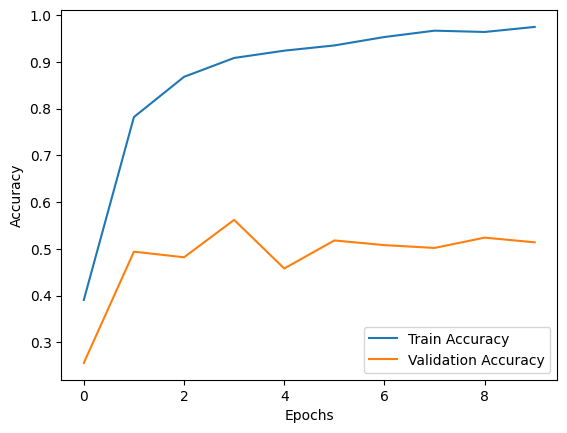

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

MEL SPECTROGRAM CNN

In [ ]:
train_X_ex = np.expand_dims(train_mel_spectrograms, -1)
test_X_ex = np.expand_dims(test_mel_spectrograms, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)

train X shape: (2500, 128, 40, 1)
test X shape: (500, 128, 40, 1)


In [ ]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
m = Dropout(0.2)(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(inputs=ip, outputs=op)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)         │ (None, 128, 40, 1)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_7 (Conv2D)                  │ (None, 125, 37, 64)           │       1,088 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_7 (MaxPooling2D)     │ (None, 31, 9, 64)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_7 (Dropout)                │ (None, 31, 9, 64)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_3 (Flatten)                │ (None, 17856)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_14 (Dense)                   │ (None, 32)                    │     571,424 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_15 (Dense)                   │ (None, 10)                    │         330 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 572,842 (2.19 MB)

 Trainable params: 572,842 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_data=(test_X_ex, test_y))

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.3739 - loss: 2.3627 - val_accuracy: 0.2380 - val_loss: 2.2137
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6795 - loss: 1.0257 - val_accuracy: 0.1600 - val_loss: 2.2349
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6999 - loss: 0.9140 - val_accuracy: 0.2240 - val_loss: 2.1775
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7623 - loss: 0.7196 - val_accuracy: 0.2480 - val_loss: 2.2715
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 0.5731 - val_accuracy: 0.1740 - val_loss: 2.2680
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8076 - loss: 0.5821 - val_accuracy: 0.2840 - val_loss: 2.1790
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8388 - loss: 0.4890 - val_accuracy: 0.1980 - val_loss: 2.2798
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8433 - loss: 0.5731 - val_accuracy: 0.2140 - val_loss

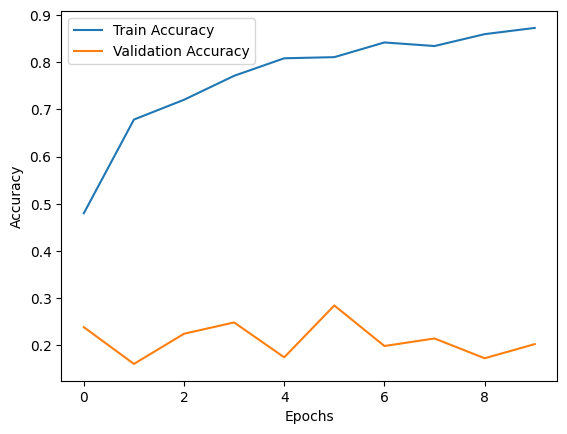

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

MFCC CNN

In [ ]:
train_X_ex = np.expand_dims(train_mfccs, -1)
test_X_ex = np.expand_dims(test_mfccs, -1)
print('train X shape:', train_X_ex.shape)
print('test X shape:', test_X_ex.shape)


train X shape: (2500, 20, 40, 1)
test X shape: (500, 20, 40, 1)


In [ ]:
ip = Input(shape=train_X_ex[0].shape)
m = Conv2D(64, kernel_size=(4, 4), activation='relu')(ip)
m = MaxPooling2D(pool_size=(4, 4))(m)
# m = Conv2D(128, kernel_size=(2, 2), activation='relu')(ip)
# m = MaxPooling2D(pool_size=(2, 2))(m)
m = Flatten()(m)
m = Dense(32, activation='relu')(m)
op = Dense(10, activation='softmax')(m)

model = Model(inputs=ip, outputs=op)

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)         │ (None, 20, 40, 1)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_9 (Conv2D)                  │ (None, 17, 37, 64)            │       1,088 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_9 (MaxPooling2D)     │ (None, 4, 9, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_5 (Flatten)                │ (None, 2304)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_18 (Dense)                   │ (None, 32)                    │      73,760 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_19 (Dense)                   │ (None, 10)                    │         330 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 75,178 (293.66 KB)

 Trainable params: 75,178 (293.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_X_ex,
          train_y,
          epochs=100,
          batch_size=32,
          verbose=0,
          validation_data=(test_X_ex, test_y))

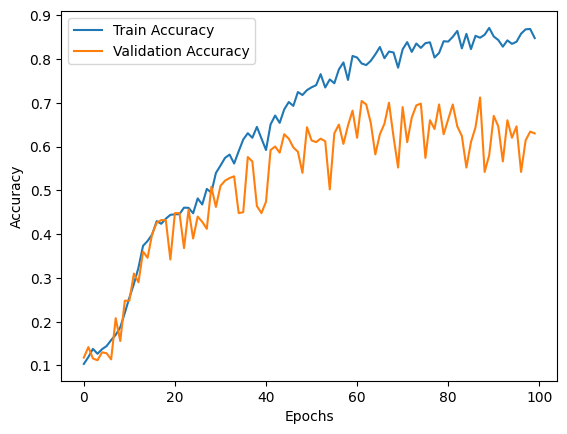

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()